In [1]:
!pip install nolds
!pip install hmmlearn
!pip install yfinance
!pip install statsmodels

  Obtaining dependency information for nolds from https://files.pythonhosted.org/packages/b8/bc/2c7e78753d2d713aae8c0a41178deacdcae0706e3cc977abc471eba84277/nolds-0.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/225.7 kB ? eta -:--:--
   - -------------------------------------- 10.2/225.7 kB ? eta -:--:--
   ----- --------------------------------- 30.7/225.7 kB 435.7 kB/s eta 0:00:01
   ------------------ ------------------- 112.6/225.7 kB 939.4 kB/s eta 0:00:01
   ---------------------------------------- 225.7/225.7 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for hmmlearn from https://files.pythonhosted.org/packages/c8/5f/65b892737fed694b23a753b516cd851d21963abd33ea86123723f6279987/hmmlearn-0.3.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/127.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/127.0 kB 653.6 kB

In [2]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
from pylab import plot, show
import matplotlib.pyplot as plt

In [ ]:
# Uncomment this when running from colab
#from google.colab import drive
#drive.mount('/content/drive')
# path = '/content/drive/My Drive/WQU/Capstone/data/symbol=NIFTY02MAY2420500PE'

Mounted at /content/drive


In [5]:
# Comment this when running from colab
path = './data/parquet_out'

In [6]:
# load dataset

#path = '/content/drive/My Drive/WQU/Capstone/data/symbol=NIFTY02MAY2420500PE'

df = pd.read_parquet(path)
print(df.head())

                        time    symbol bidqty askqty       ltp   atp   ask  \
0  2025-08-01T09:15:00+05:30  NIFTY 50      0      0  24723.55  0.00  0.00   
1  2025-08-01T09:16:00+05:30  NIFTY 50      0      0  24712.80  0.00  0.00   
2  2025-08-01T09:17:00+05:30  NIFTY 50      0      0  24718.15  0.00  0.00   
3  2025-08-01T09:18:00+05:30  NIFTY 50      0      0  24722.50  0.00  0.00   
4  2025-08-01T09:19:00+05:30  NIFTY 50      0      0  24726.00  0.00  0.00   

    bid oi tot_vol tot_buyqty tot_sellqty ltq                  ltt level2  \
0  0.00  0       0          0           0   0  2025-08-01 09:15:00   None   
1  0.00  0       0          0           0   0  2025-08-01 09:16:00   None   
2  0.00  0       0          0           0   0  2025-08-01 09:17:00   None   
3  0.00  0       0          0           0   0  2025-08-01 09:18:00   None   
4  0.00  0       0          0           0   0  2025-08-01 09:19:00   None   

  recv_time bcast_time security_id  
0         0       None      256

In [4]:
df.head(10)

,time,symbol,bidqty,askqty,ltp,atp,ask,bid,oi,tot_vol,tot_buyqty,tot_sellqty,ltq,ltt,level2,recv_time,bcast_time,security_id
0,2025-08-01T09:15:00+05:30,NIFTY 50,0,0,24723.55,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:15:00,None,0,None,256265
1,2025-08-01T09:16:00+05:30,NIFTY 50,0,0,24712.80,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:16:00,None,0,None,256265
2,2025-08-01T09:17:00+05:30,NIFTY 50,0,0,24718.15,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:17:00,None,0,None,256265
3,2025-08-01T09:18:00+05:30,NIFTY 50,0,0,24722.50,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:18:00,None,0,None,256265
4,2025-08-01T09:19:00+05:30,NIFTY 50,0,0,24726.00,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:19:00,None,0,None,256265
5,2025-08-01T09:20:00+05:30,NIFTY 50,0,0,24731.20,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:20:00,None,0,None,256265
6,2025-08-01T09:21:00+05:30,NIFTY 50,0,0,24726.95,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:21:00,None,0,None,256265
7,2025-08-01T09:22:00+05:30,NIFTY 50,0,0,24725.25,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:22:00,None,0,None,256265
8,2025-08-01T09:23:00+05:30,NIFTY 50,0,0,24719.00,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:23:00,None,0,None,256265
9,2025-08-01T09:24:00+05:30,NIFTY 50,0,0,24712.70,0.00,0.00,0.00,0,0,0,0,0,2025-08-01 09:24:00,None,0,None,256265


In [ ]:
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(['date', 'time'])


/tmp/ipython-input-3849171626.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for date, d in df.groupby('date'):


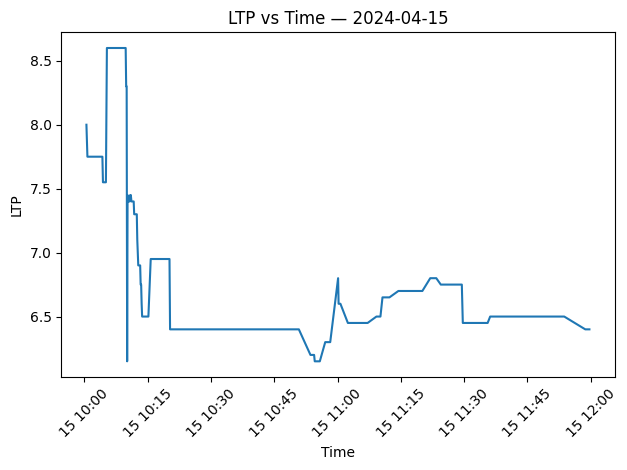

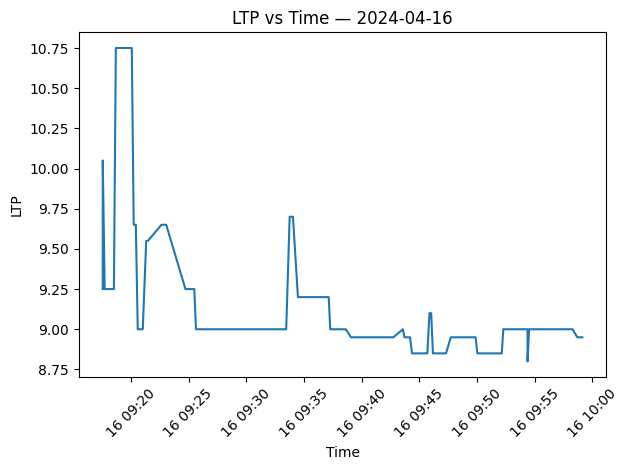

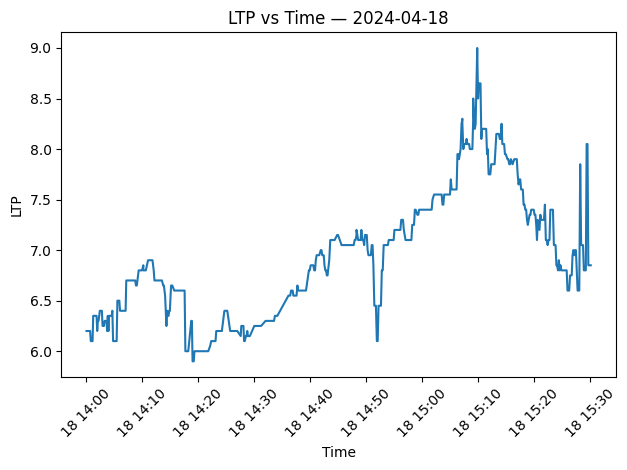

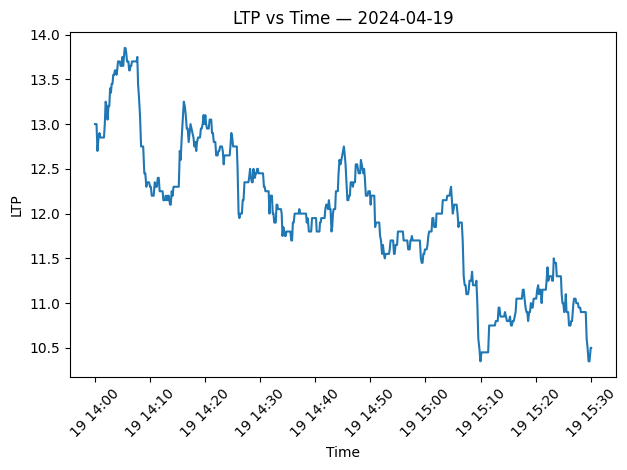

In [ ]:
for date, d in df.groupby('date'):
    plt.figure()
    plt.plot(d['time'], d['ltp'])
    plt.title(f"LTP vs Time — {date}")
    plt.xlabel("Time")
    plt.ylabel("LTP")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df.head()

,symbol,time,ltp,buy_price,buy_qty,sell_price,sell_qty,ltq,open_interest,date
0,NIFTY02MAY2420500PE,2024-04-15 10:00:30,8.00,7.05,250,8.40,100,0,4800,2024-04-15
1,NIFTY02MAY2420500PE,2024-04-15 10:00:44,7.75,7.10,100,7.75,650,150,5250,2024-04-15
2,NIFTY02MAY2420500PE,2024-04-15 10:00:51,7.75,7.10,100,7.80,600,0,5250,2024-04-15
3,NIFTY02MAY2420500PE,2024-04-15 10:00:59,7.75,7.55,100,8.30,50,0,5250,2024-04-15
4,NIFTY02MAY2420500PE,2024-04-15 10:01:07,7.75,7.55,100,8.10,50,0,5250,2024-04-15


**Calculation of Hurst Exponent and DFA**

In [ ]:
import numpy as np
import pandas as pd
import nolds


def compute_hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts
    using R/S method from nolds.

    Parameters
    ----------
    ts : numpy.array
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    float
        Hurst Exponent
    """
    # nolds expects finite values
    ts = np.asarray(ts)
    ts = ts[np.isfinite(ts)]

    if len(ts) < 20:
        return np.nan

    return nolds.hurst_rs(ts)



def compute_dfa(ts):
    """
    Returns the Hurst Exponent of the time series vector ts
    using DFA (Detrended Fluctuation Analysis).

    Parameters
    ----------
    ts : numpy.array
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    float
        Hurst Exponent
    """
    ts = np.asarray(ts)
    ts = ts[np.isfinite(ts)]

    # DFA needs a reasonably long series
    if len(ts) < 50:
        return np.nan

    # DFA directly returns the scaling exponent (H)
    return nolds.dfa(ts)



def rolling_hurst(series, window=500):
    """
    Compute rolling Hurst exponent.

    Parameters
    ----------
    series : pd.Series
        Time series (prices or returns)
    window : int
        Rolling window size

    Returns
    -------
    pd.Series
        Rolling Hurst exponent
    """
    hurst_vals = np.full(len(series), np.nan)

    for i in range(window, len(series)):
        window_data = series.iloc[i - window:i].values
        try:
            hurst_vals[i] = compute_dfa(window_data)
        except Exception:
            hurst_vals[i] = np.nan

    return pd.Series(hurst_vals, index=series.index)


def hurst_regime(H):
    if H < 0.45:
        return "AntiPersistent"
    elif H > 0.55:
        return "Persistent"
    else:
        return "Neutral"


In [ ]:
df['log_return'] = np.log(
    df['ltp'] / df.groupby(['date'])['ltp'].shift(1)
).dropna()

#df['hurst'] = rolling_hurst(df['log_return'], window=500)
df['hurst'] = (
    df.groupby('date')['log_return']
      .apply(lambda x: rolling_hurst(x, window=500))
      .reset_index(level=0, drop=True))
df['hurst_regime'] = df['hurst'].apply(hurst_regime)
df['hurst_regime'].unique()

/tmp/ipython-input-850569811.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['ltp'] / df.groupby(['date'])['ltp'].shift(1)
/tmp/ipython-input-850569811.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('date')['log_return']


array(['Neutral', 'AntiPersistent', 'Persistent'], dtype=object)

**Regime Switching - HMM**

In [ ]:
from hmmlearn.hmm import GaussianHMM
def rolling_hmm_states(df, window=750, n_states=2):
    states = np.full(len(df), np.nan)
    probs = np.full(len(df), np.nan)

    for i in range(window, len(df)):
        X = df[['log_return', 'rolling_vol']].iloc[i-window:i].values
        X = StandardScaler().fit_transform(df[features].dropna())

        model = GaussianHMM(
            n_components=n_states,
            covariance_type="full",
            n_iter=200
        )
        model.fit(X)

        state_probs = model.predict_proba(X[-1].reshape(1, -1))
        high_vol_state = np.argmax(model.means_[:, 1])  # volatility column

        states[i] = high_vol_state
        probs[i] = state_probs[0, high_vol_state]

    return states, probs



In [ ]:
window = 20
df['rolling_vol'] = (
    df.groupby('date')['log_return']
      .rolling(window)
      .std()
      .reset_index(level=0, drop=True)
)
df = df.dropna(subset=['rolling_vol'])
df['hmm_state'], df['hmm_high_vol_prob'] = rolling_hmm_states(df)


/tmp/ipython-input-4132727524.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('date')['log_return']
/tmp/ipython-input-4132727524.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hmm_state'], df['hmm_high_vol_prob'] = rolling_hmm_states(df)
/tmp/ipython-input-4132727524.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

**Combining Hurst Exponent & HMM**

In [ ]:
def joint_regime(row):
    if row['hurst'] < 0.45 and row['hmm_high_vol_prob'] < 0.4:
        return "MR_Stable"
    elif row['hurst'] < 0.45 and row['hmm_high_vol_prob'] >= 0.4:
        return "MR_Risky"
    elif row['hurst'] > 0.55:
        return "Trend"
    else:
        return "Neutral"

#df.columns = df.columns.get_level_values(0)
df['joint_regime'] = df.apply(joint_regime, axis=1)


/tmp/ipython-input-3462798346.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['joint_regime'] = df.apply(joint_regime, axis=1)


**Postion Sizing**

In [ ]:
def position_size(row, base_risk=1.0):
    if row['joint_regime'] == "Trend":
        return 0.0

    hurst_conf = np.maximum(0.0, (0.5 - row['hurst']) / 0.1)
    vol_conf = 1.0 - row['hmm_high_vol_prob']

    size = base_risk * hurst_conf * vol_conf

    if row['joint_regime'] == "MR_Risky":
        size *= 0.5

    return np.clip(size, 0.0, base_risk)

df['position_size'] = df.apply(position_size, axis=1)


/tmp/ipython-input-2031332218.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position_size'] = df.apply(position_size, axis=1)


In [ ]:
window = 20

rolling_mean = (
    df.groupby('date')['ltp']
      .rolling(window)
      .mean()
      .reset_index(level=0, drop=True)
)

rolling_std = (
    df.groupby('date')['ltp']
      .rolling(window)
      .std()
      .reset_index(level=0, drop=True)
)

z = (df['ltp'] - rolling_mean) / rolling_std
df['signal'] = -np.sign(z)
df['strategy_return'] = (
    df['signal'].shift(1) * df['log_return'] * df['position_size']
)


/tmp/ipython-input-2371133317.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('date')['ltp']
/tmp/ipython-input-2371133317.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('date')['ltp']
/tmp/ipython-input-2371133317.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['signal'] = -np.sign(z)
/tmp/ipython-input-2371133317.py:19: SettingW

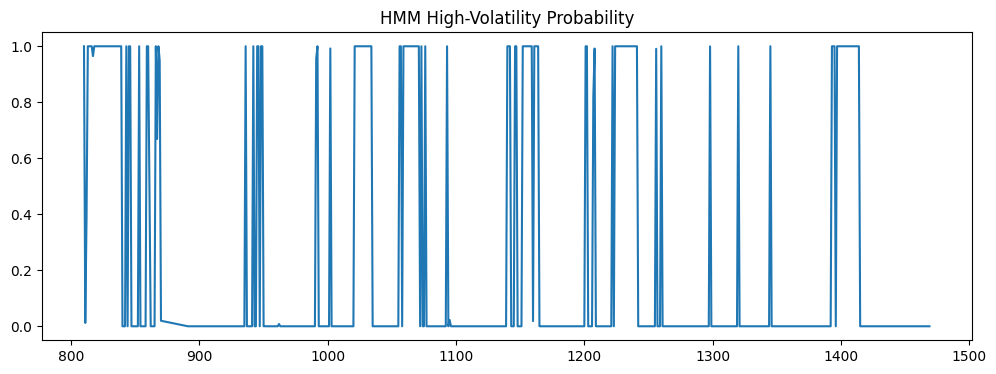

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df['hmm_high_vol_prob'])
plt.title("HMM High-Volatility Probability")
plt.show()


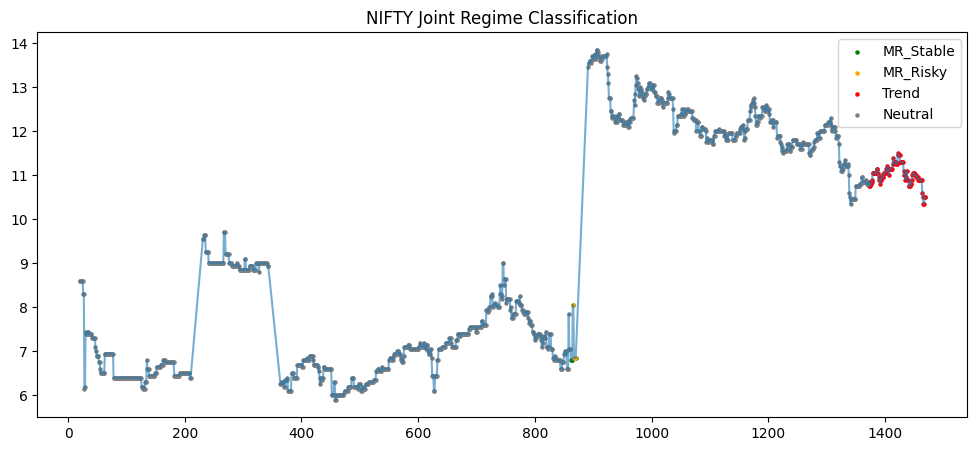

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['ltp'], alpha=0.6)

colors = {
    "MR_Stable": "green",
    "MR_Risky": "orange",
    "Trend": "red",
    "Neutral": "gray"
}

for regime, color in colors.items():
    mask = df['joint_regime'] == regime
    plt.scatter(df.index[mask], df['ltp'][mask], s=5, color=color, label=regime)

plt.legend()
plt.title(f"{symbol} Joint Regime Classification")
plt.show()


In [ ]:
df['equity'] = (
    1 + df['strategy_return']
).groupby(df['date']).cumprod()

df['bh_equity'] = (
    1 + df['log_return']
).groupby(df['date']).cumprod()



/tmp/ipython-input-475167652.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby(df['date']).cumprod()
/tmp/ipython-input-475167652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['equity'] = (
/tmp/ipython-input-475167652.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ).groupby(df['date']).cumprod()
/tmp/ipython-input-475167652.py:5: SettingWithCo

/tmp/ipython-input-3512418058.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for date, d in df.groupby('date'):


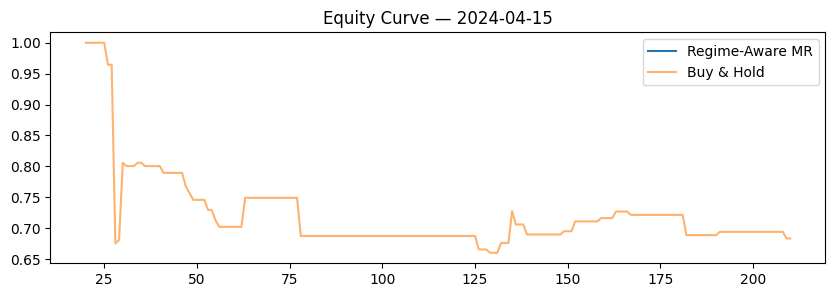

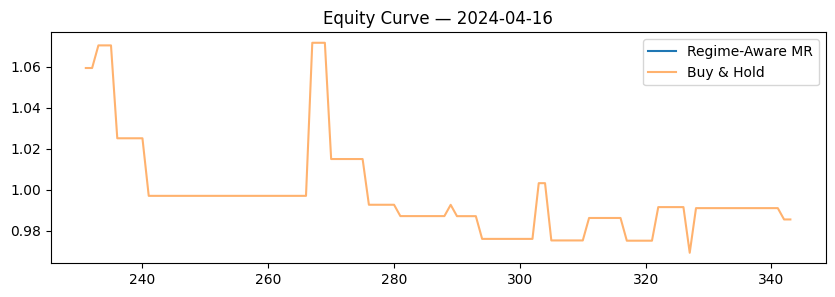

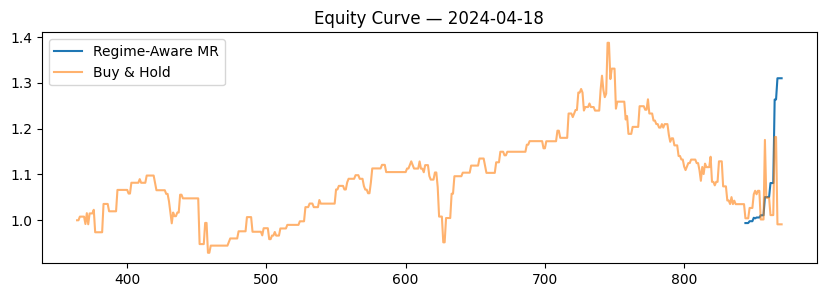

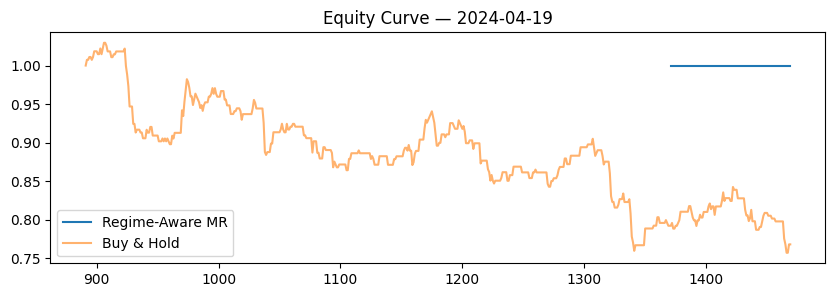

In [ ]:
for date, d in df.groupby('date'):
    plt.figure(figsize=(10,3))
    plt.plot(d['equity'], label='Regime-Aware MR')
    plt.plot(d['bh_equity'], label='Buy & Hold', alpha=0.6)
    plt.title(f'Equity Curve — {date}')
    plt.legend()
    plt.show()


In [ ]:
for d in ['2024-04-15', '2024-04-16']:
    print(d)
    print(df[df['date'] == d]['signal'].value_counts())
    print(df[df['date'] == d]['hurst_regime'].value_counts())
    print('-' * 30)


2024-04-15
signal
 1.0    74
-1.0    67
-0.0     2
Name: count, dtype: int64
hurst_regime
Neutral    191
Name: count, dtype: int64
------------------------------
2024-04-16
signal
 1.0    51
-1.0    36
Name: count, dtype: int64
hurst_regime
Neutral    113
Name: count, dtype: int64
------------------------------


In [ ]:
for d in ['2024-04-15', '2024-04-16']:
    print(d)
    print(df[df['date'] == d]['position_size'].value_counts())
    print('-' * 30)

2024-04-15
Series([], Name: count, dtype: int64)
------------------------------
2024-04-16
Series([], Name: count, dtype: int64)
------------------------------
